In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# #Загрузим датасет

In [2]:
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)

In [3]:
x_bp.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.0                        22.267857   
1                         50.0                        23.750000   
2                         49.9                        33.000000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0

In [4]:
x_bp.shape

(1023, 10)

In [5]:
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)

In [6]:
x_nup.head(3)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0

In [7]:
x_nup.shape

(1040, 3)

In [8]:
x_nup1=x_nup.tail(17)
x_nup1.head(2)

Угол нашивки, град  Шаг нашивки  Плотность нашивки
1023                  90     5.858635          54.205124
1024                  90     7.607928          79.842925

Oбъединим данные в один датафрейм

In [9]:
df = x_nup.merge(x_bp, left_index = True, right_index = True, how = 'inner')

In [10]:
df = pd.concat([df,x_nup1],sort=False,axis=0)

Найдем пропущенные значения и заполним пропуски с помощью SimpleImputer

In [11]:
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              0
Плотность нашивки                        0
Соотношение матрица-наполнитель         17
Плотность, кг/м3                        17
модуль упругости, ГПа                   17
Количество отвердителя, м.%             17
Содержание эпоксидных групп,%_2         17
Температура вспышки, С_2                17
Поверхностная плотность, г/м2           17
Модуль упругости при растяжении, ГПа    17
Прочность при растяжении, МПа           17
Потребление смолы, г/м2                 17
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
df=impute.fit_transform(df)
df = pd.DataFrame(data=df, columns=["Угол нашивки, град", "Шаг нашивки", "Плотность нашивки", "Соотношение матрица-наполнитель", "Плотность, кг/м3",
                                   "модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2 ",
                                    "Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа",
                                    "Потребление смолы, г/м2"])

In [13]:
df.nunique() #найдем число уникальных значений в каждом столбце

Угол нашивки, град                         2
Шаг нашивки                             1006
Плотность нашивки                       1005
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [14]:
df.duplicated().sum() #проверим датасет на дубликаты

0

In [15]:
df.describe().T

count         mean         std  \
Угол нашивки, град                    1040.0    45.000000   45.021650   
Шаг нашивки                           1040.0     6.911385    2.555181   
Плотность нашивки                     1040.0    57.248399   12.332438   
Соотношение матрица-наполнитель       1040.0     2.929982    0.905725   
Плотность, кг/м3                      1040.0  1975.765730   73.123960   
модуль упругости, ГПа                 1040.0   739.919001  327.518834   
Количество отвердителя, м.%           1040.0   110.570672   28.063469   
Содержание эпоксидных групп,%_2       1040.0    22.244166    2.386535   
Температура вспышки, С_2              1040.0   285.882391   40.606924   
Поверхностная плотность, г/м2         1040.0   482.227269  279.031259   
Модуль упругости при растяжении, ГПа  1040.0    73.327594    3.093371   
Прочность при растяжении, МПа         1040.0  2466.801909  481.639640   
Потребление смолы, г/м2               1040.0   218.435824   59.245301   

                                              min          25%          50%  \
Угол нашивки, град                       0.000000     0.000000    45.000000   
Шаг нашивки                              0.000000     5.102256     6.938000   
Плотность нашивки                        0.000000    49.970740    57.413594   
Соотношение матрица-наполнитель          0.389403     2.334609     2.906878   
Плотность, кг/м3                      1731.764635  1925.431861  1977.621657   
модуль упругости, ГПа                    2.436909   506.989762   739.664328   
Количество отвердителя, м.%             17.740275    92.621151   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.625305    22.230744   
Температура вспышки, С_2               100.000000   259.429296   285.896812   
Поверхностная плотность, г/м2            0.603740   268.717312   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.306242    73.268805   
Прочность при растяжении, МПа         1036.856605  2144.984844  2459.524526   
Потребление смолы, г/м2                 33.803026   180.036067   219.198882   

                                              75%          max  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.587662    14.440522  
Плотность нашивки                       65.107235   103.988901  
Соотношение матрица-наполнитель          3.548143     5.591742  
Плотность, кг/м3                      2020.985806  2207.773481  
модуль упругости, ГПа                  956.922982  1911.536477  
Количество отвердителя, м.%            129.415915   198.953207  
Содержание эпоксидных групп,%_2         23.954765    33.000000  
Температура вспышки, С_2               312.567807   413.273418  
Поверхностная плотность, г/м2          690.361894  1399.542362  
Модуль упругости при растяжении, ГПа    75.321637    82.682051  
Прочность при растяжении, МПа         2758.749272  3848.436732  
Потребление смолы, г/м2                256.854913   414.590628

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1040 non-null   float64
 1   Шаг нашивки                           1040 non-null   float64
 2   Плотность нашивки                     1040 non-null   float64
 3   Соотношение матрица-наполнитель       1040 non-null   float64
 4   Плотность, кг/м3                      1040 non-null   float64
 5   модуль упругости, ГПа                 1040 non-null   float64
 6   Количество отвердителя, м.%           1040 non-null   float64
 7   Содержание эпоксидных групп,%_2       1040 non-null   float64
 8   Температура вспышки, С_2              1040 non-null   float64
 9   Поверхностная плотность, г/м2         1040 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1040 non-null   float64
 11  Прочность при рас

<AxesSubplot:xlabel='Угол нашивки, град', ylabel='count'>

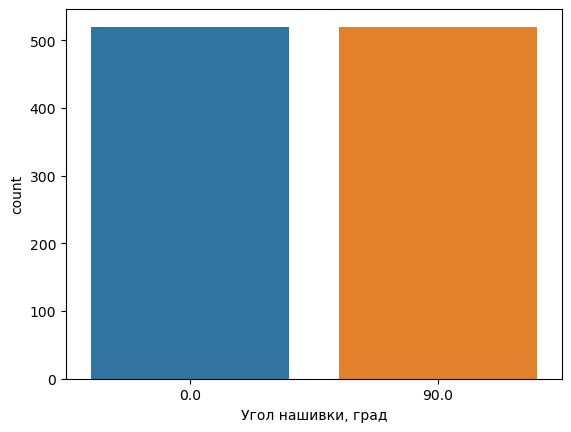

In [17]:
sns.countplot(x="Угол нашивки, град", data=df) 

Проанализируем датасет на выбросы, используя метод "ящика с усами"

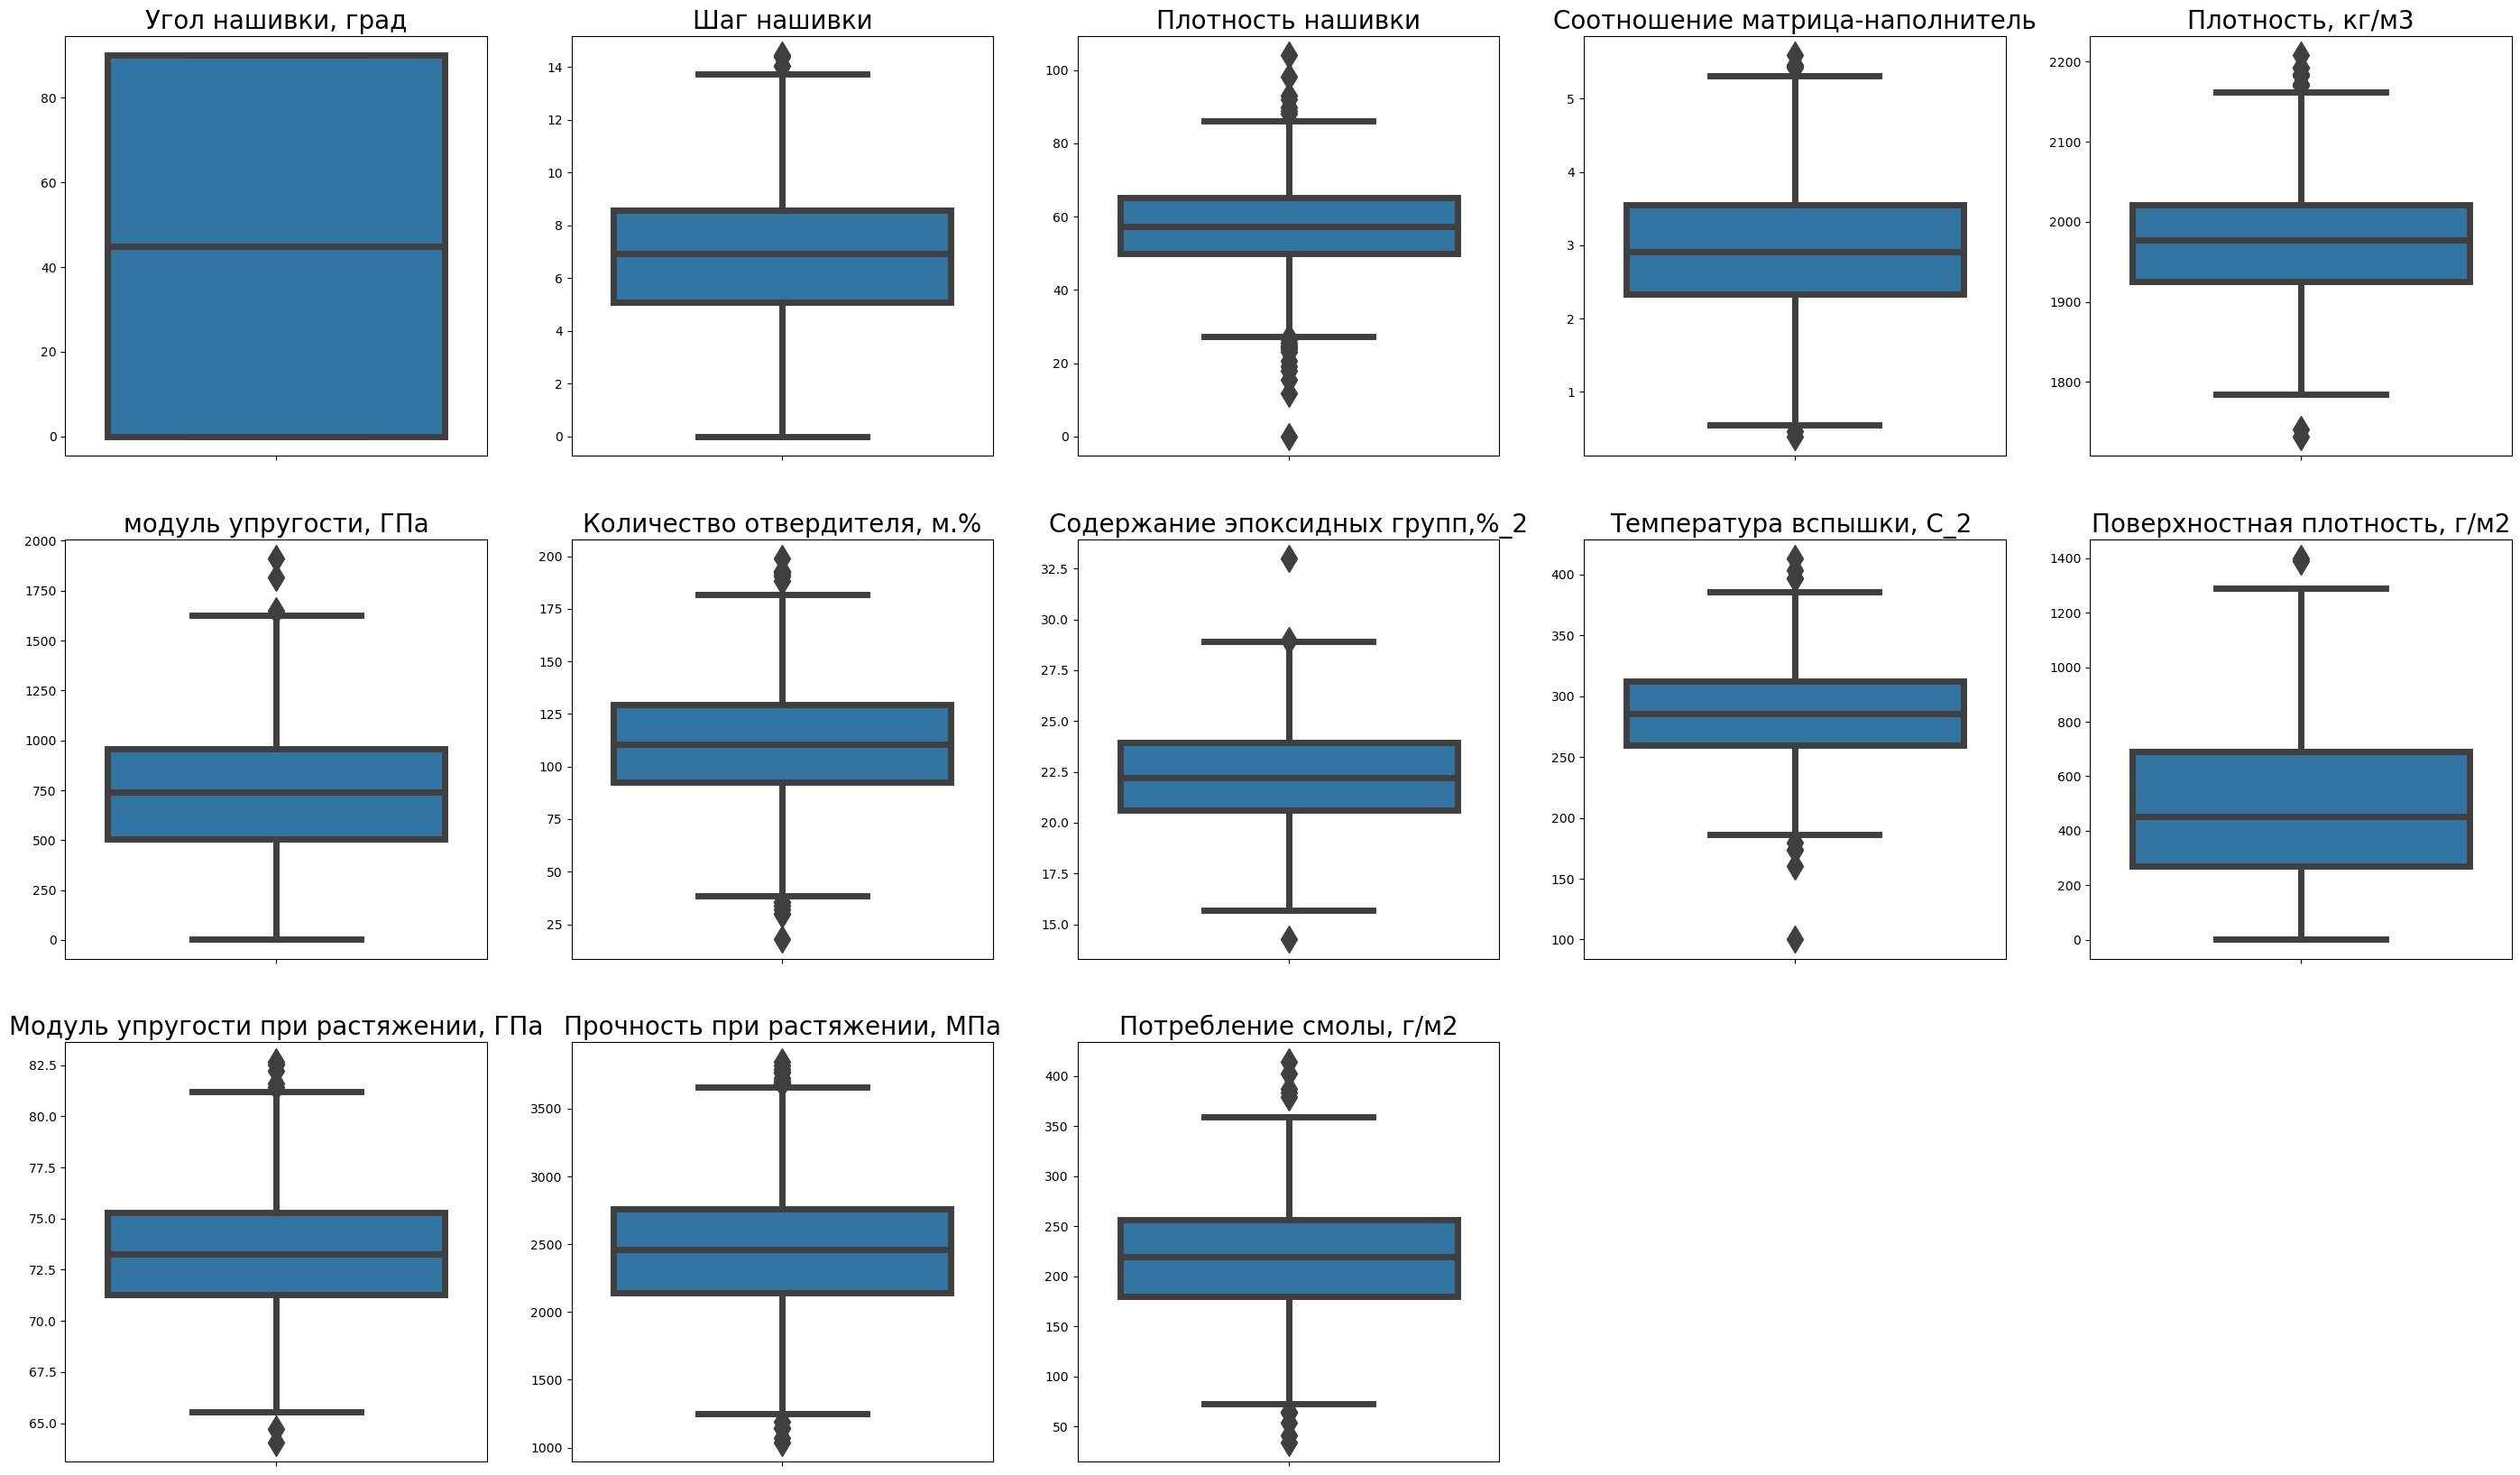

In [18]:
plt.figure(figsize=(35,35))
b=1
for col in df.columns:
    plt.subplot(5,5, b)
    sns.boxplot(data = df, y=df[col], fliersize=15, linewidth=5)
    plt.ylabel(None)
    plt.title(col, size = 20)
    b+=1

По графикам видно наличие выбросов. Избавимся от них, взяв данные с 1 по 3 квантиль.

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
indexes = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[~indexes]

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


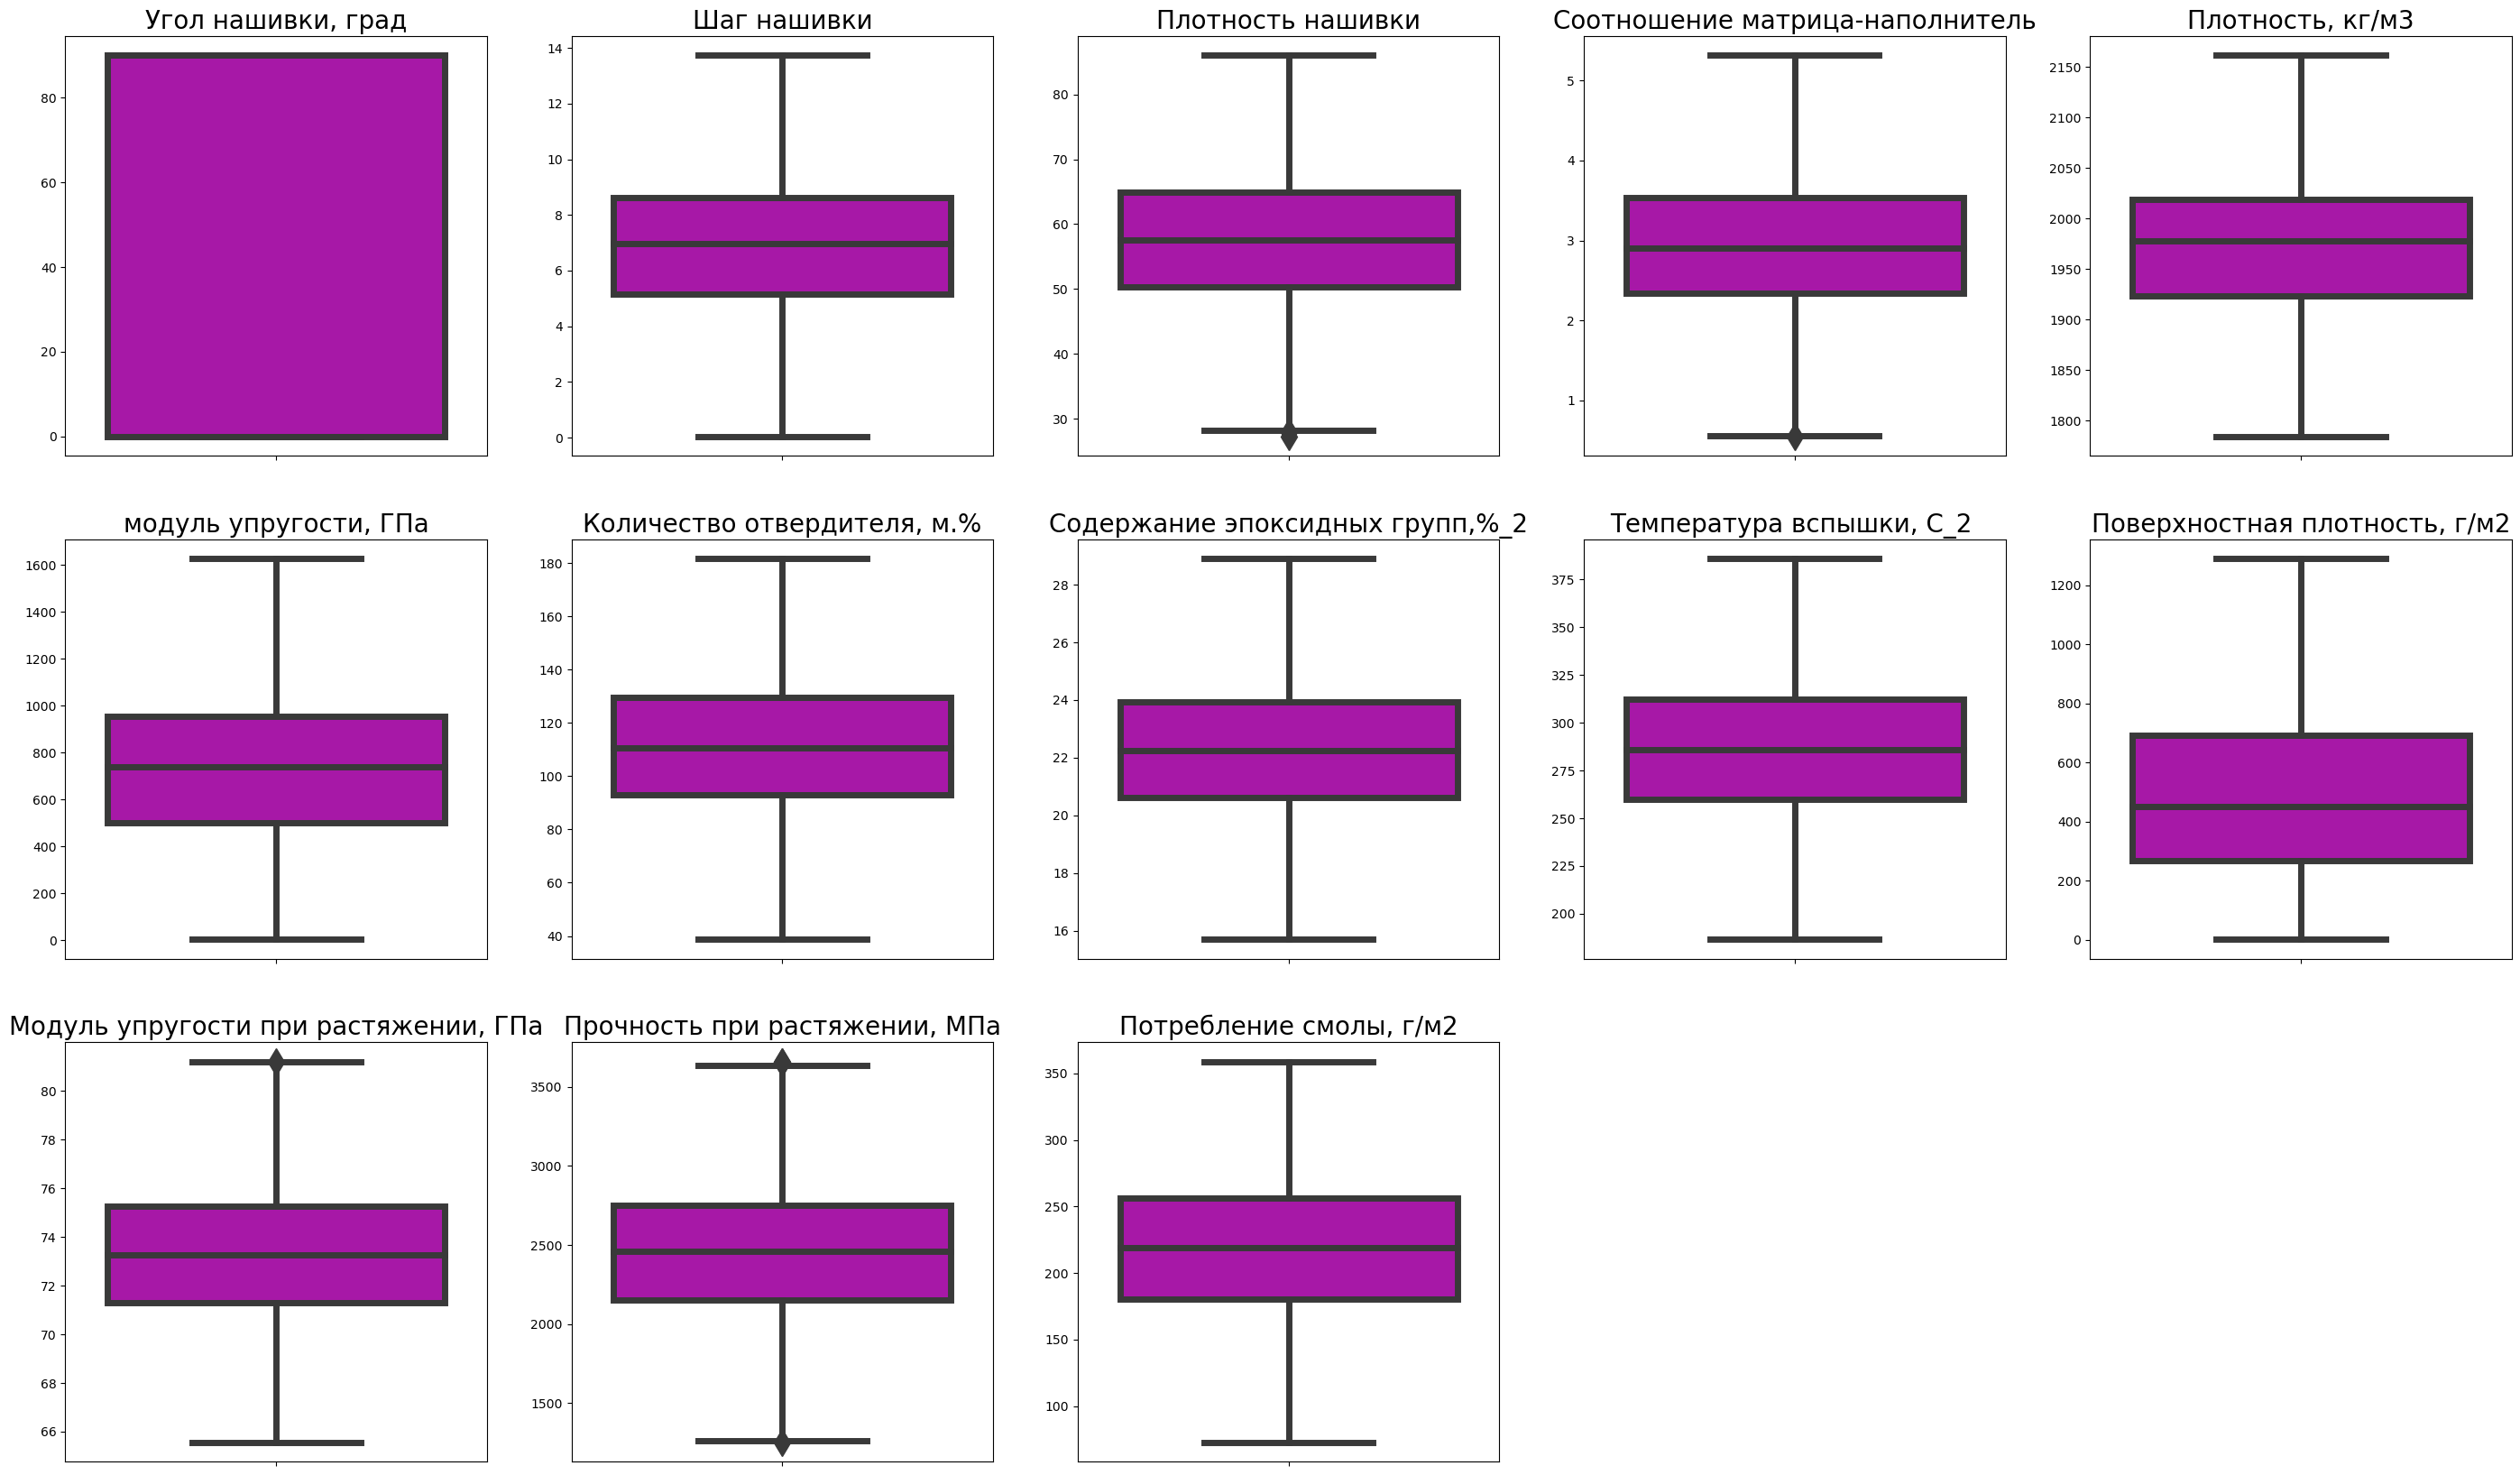

In [20]:
plt.figure(figsize=(35,35))
b=1
for col in df.columns:
    plt.subplot(5,5, b)
    sns.boxplot(data = df, y=df[col], fliersize=15, linewidth=5, color = 'm')
    plt.ylabel(None)
    plt.title(col, size = 20)
    b+=1

In [21]:
df.shape

(943, 13)

С помощью метода гистограмм определим принадлежность нашего набора данных нормальному распределению.

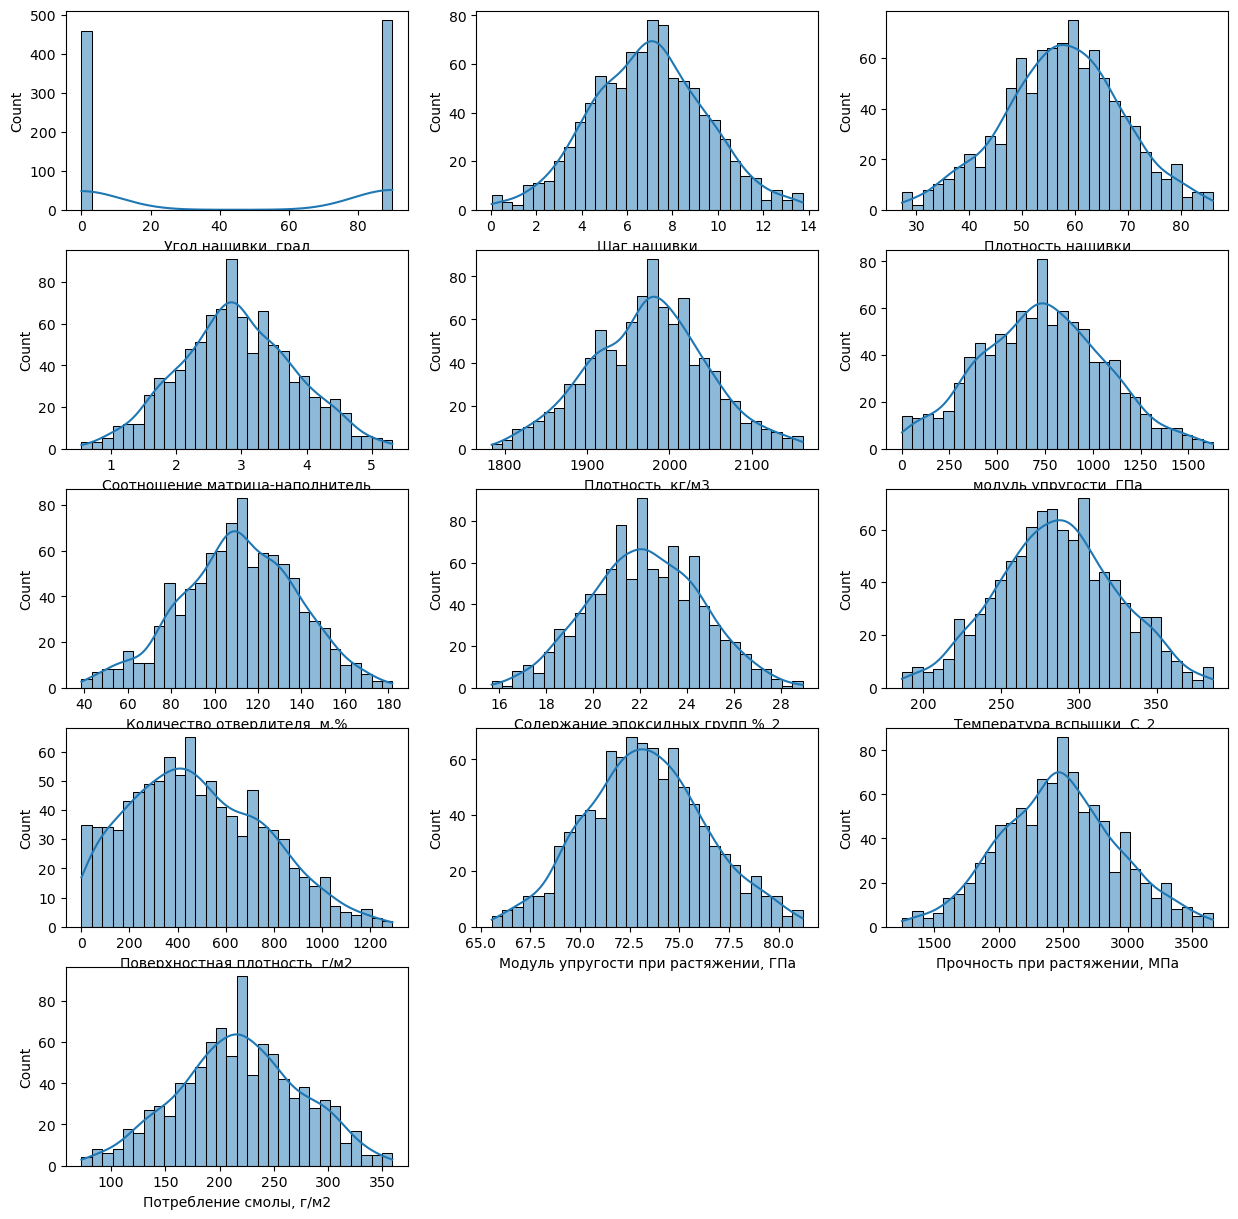

In [22]:
plt.figure(figsize = (15,15))
a=1
for col in df.columns:
    plt.subplot(5,3,a)
    sns.histplot(df[col], kde = True, bins = 30)
    a=a+1
plt.show()

In [23]:
from scipy.stats import shapiro
for col in df.columns:
    c = shapiro(df[col])
    print(col, c)

Угол нашивки, град ShapiroResult(statistic=0.6362415552139282, pvalue=1.2157385216789248e-40)
Шаг нашивки ShapiroResult(statistic=0.9981537461280823, pvalue=0.40361258387565613)
Плотность нашивки ShapiroResult(statistic=0.9966489672660828, pvalue=0.04301742836833)
Соотношение матрица-наполнитель ShapiroResult(statistic=0.9970315098762512, pvalue=0.07820652425289154)
Плотность, кг/м3 ShapiroResult(statistic=0.9969122409820557, pvalue=0.06494337320327759)
модуль упругости, ГПа ShapiroResult(statistic=0.9955533742904663, pvalue=0.007856287993490696)
Количество отвердителя, м.% ShapiroResult(statistic=0.9966896772384644, pvalue=0.04585028812289238)
Содержание эпоксидных групп,%_2 ShapiroResult(statistic=0.9980008006095886, pvalue=0.32973137497901917)
Температура вспышки, С_2  ShapiroResult(statistic=0.9969967007637024, pvalue=0.0740872472524643)
Поверхностная плотность, г/м2 ShapiroResult(statistic=0.978717565536499, pvalue=1.653793074707366e-10)
Модуль упругости при растяжении, ГПа Shapir

Распределение большинства параметров в датасете близко к нормальному. Гистограмма параметра "Поверхностная плотность" смещена влево. Попытаемся исправить ситуацию, использовав преобразование Бокса-Кокса.

In [24]:
import scipy.stats as stats
df['Поверхностная плотность, г/м2'], param = stats.boxcox(df['Поверхностная плотность, г/м2'])
df['модуль упругости, ГПа'], param = stats.boxcox(df['модуль упругости, ГПа'])

оценим получившийся результат

<AxesSubplot:xlabel='модуль упругости, ГПа', ylabel='Count'>

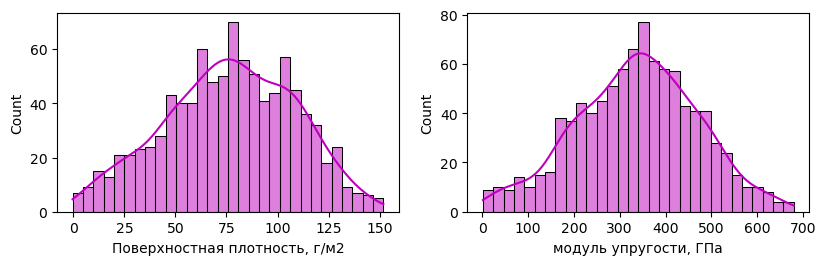

In [60]:
plt.figure(figsize = (15,15))
plt.subplot(5,3,1)
sns.histplot(df['Поверхностная плотность, г/м2'], kde = True, bins = 30, color = 'm')
plt.subplot(5,3,2)
sns.histplot(df['модуль упругости, ГПа'], kde = True, bins = 30, color = 'm')

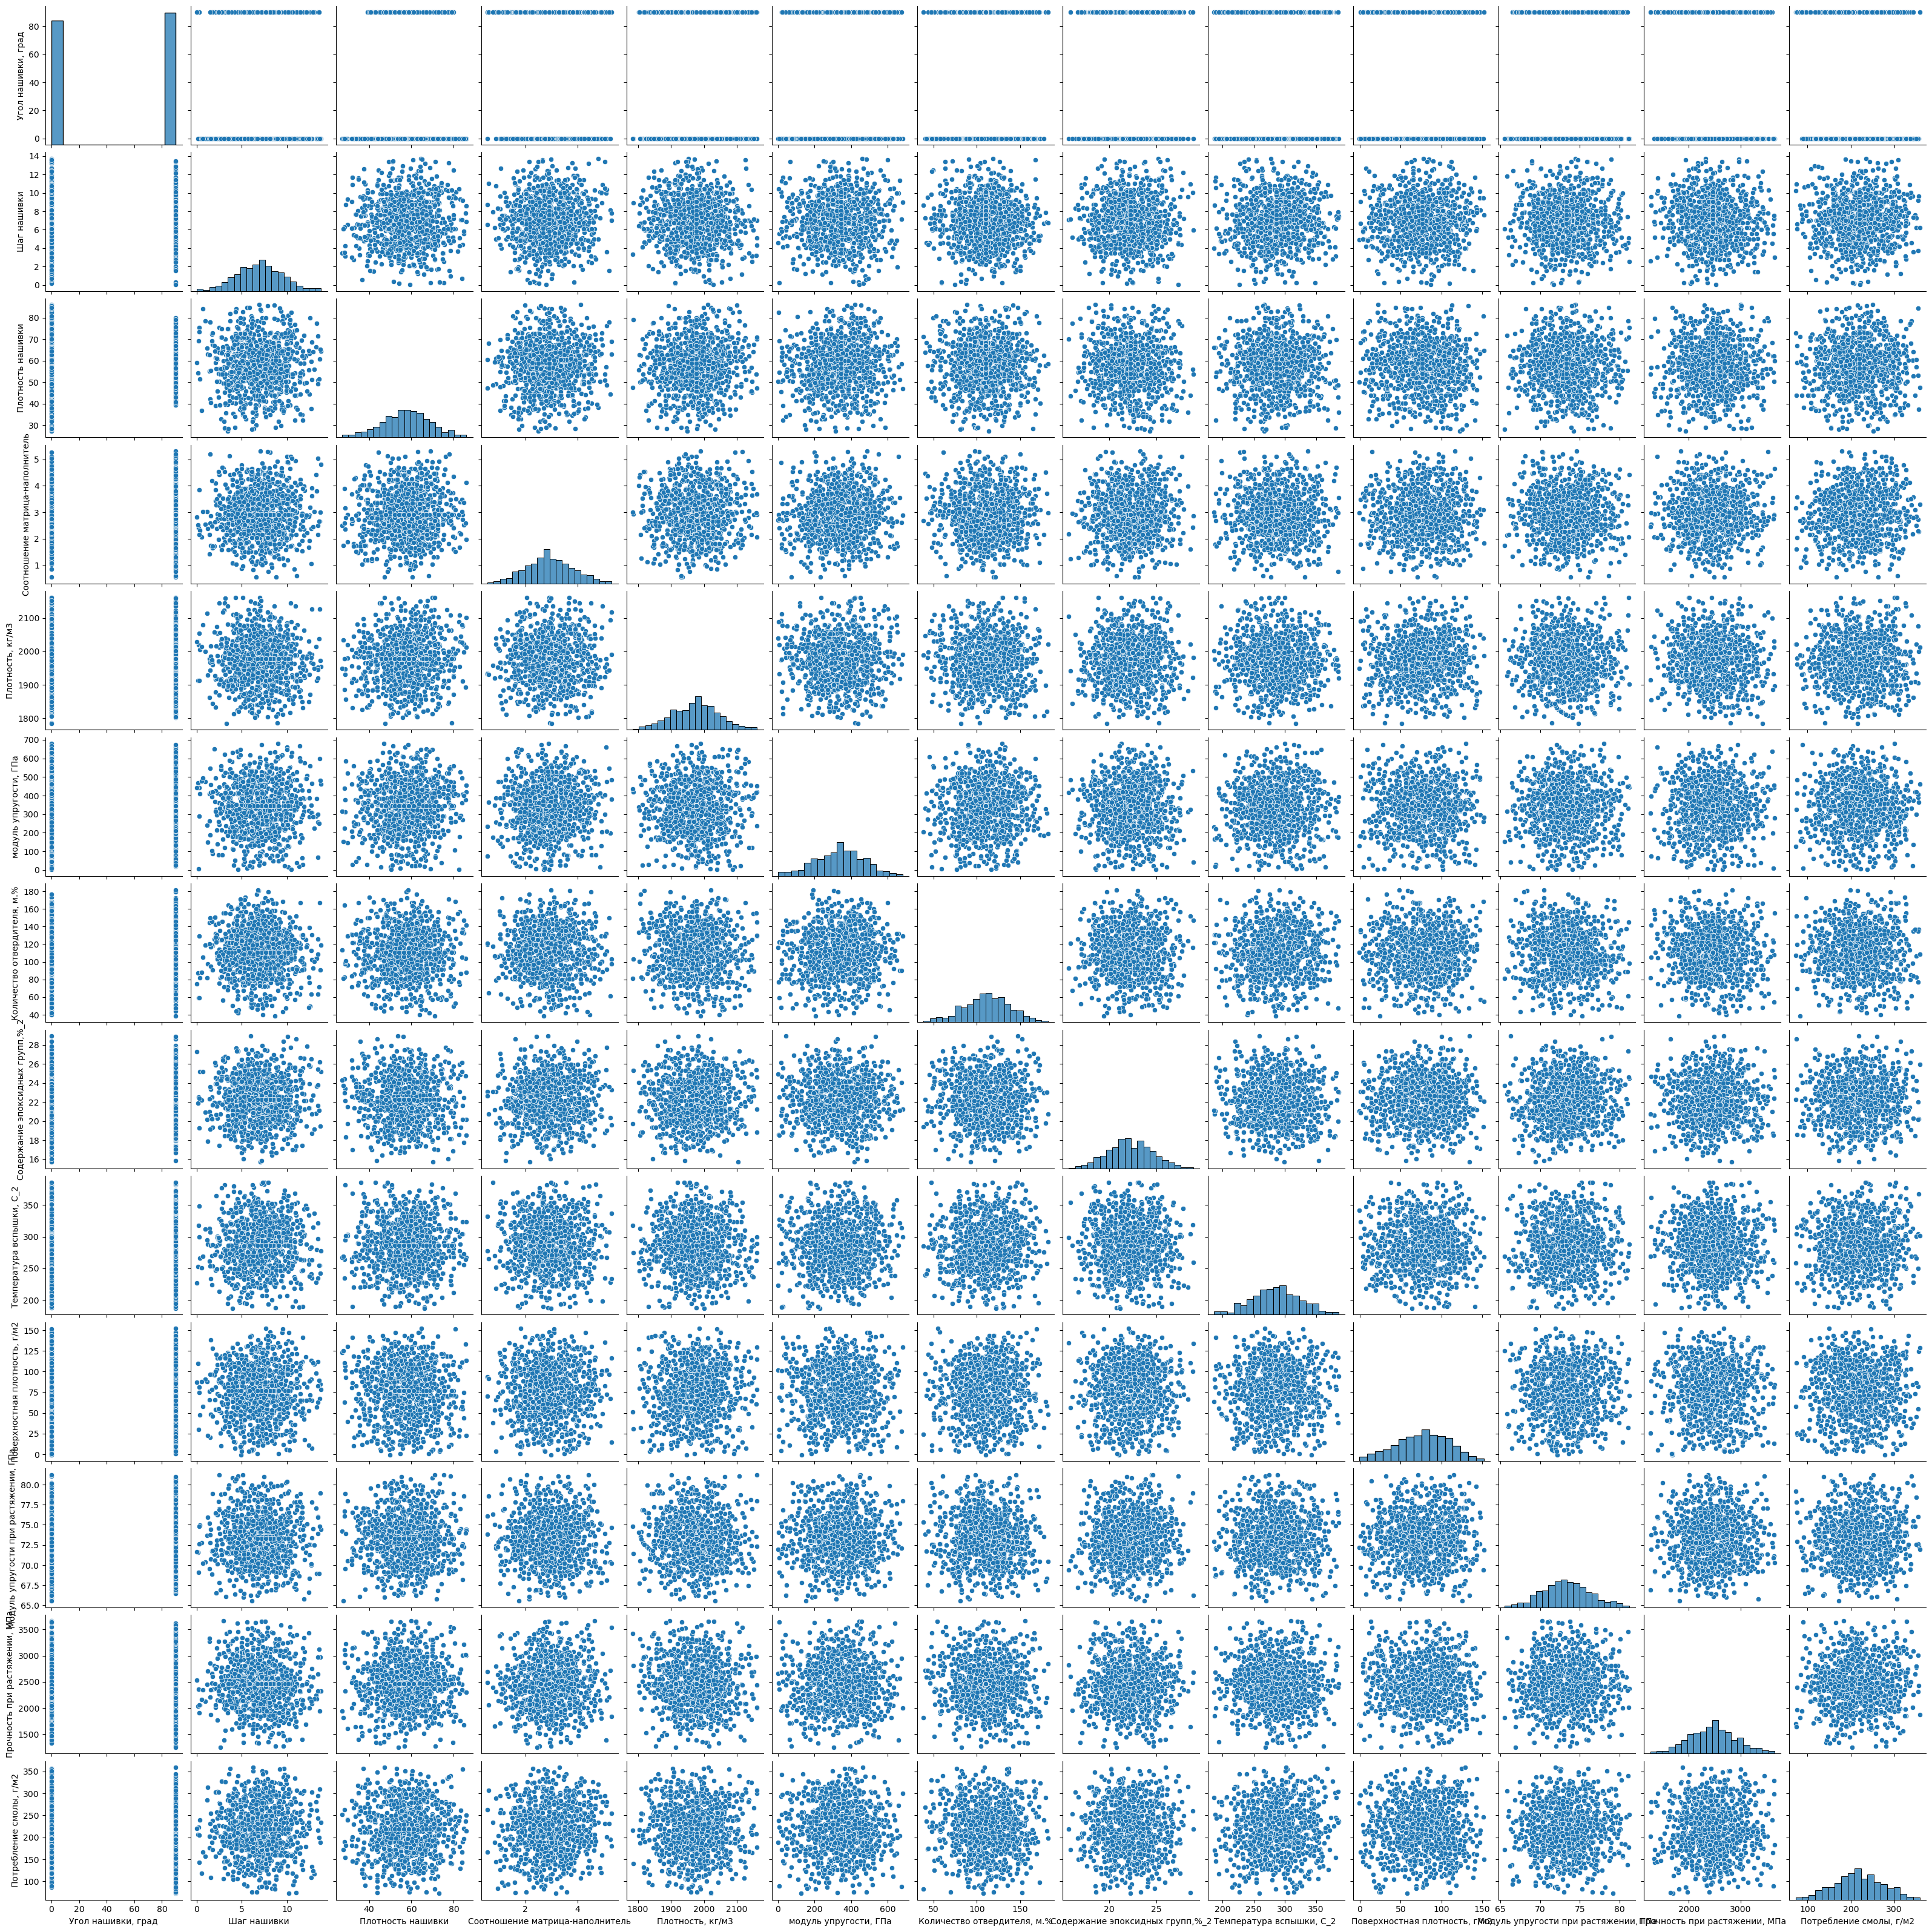

In [27]:
sns.pairplot(df);

<AxesSubplot:>

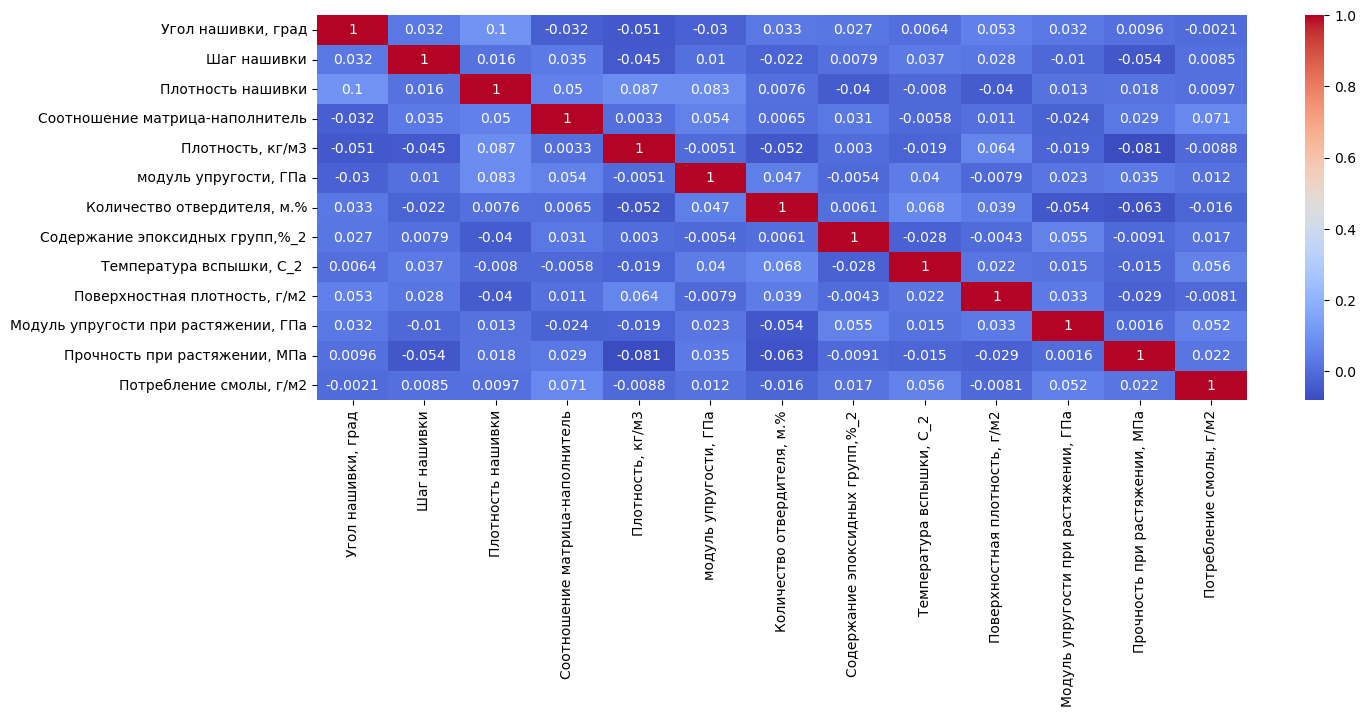

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'coolwarm')

# Разработка и обучение модели

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler

напишем функцию для представления метрик моделей в удобном виде

In [30]:
m1 = {}
m2 = {}
m_col = ['mean_squared_error', 'mean_absolute_error', 'r2_score', 'mean_absolute_percentage_error']

def me(y_test, y_pred, model_name):
    
    mse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    if y_test.columns == 'Модуль упругости при растяжении, ГПа':
        m1[model_name] = [mse, mae, r2, mape]
    else:
        m2[model_name] = [mse, mae, r2, mape] 

    print(model_name, y_test.columns)
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'R2: {r2}')
    print(f'MAPE: {mape}')

напишем функцию для представления результата работы модели в виде графика

In [31]:
def result(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title(y_test.columns)
    plt.plot(np.array(y_test)[:100], label='Target')
    plt.plot(np.array(y_pred)[:100], label='Predict')
    plt.legend()

напишем функцию для поиска по сетке значений гиперпараметров модели

In [32]:
def grid(model_name, param, x, y):
    gr = GridSearchCV(model_name, param, cv=10)
    gr.fit(x, y)
    return gr.best_params_

Выделим из датасета целевые переменные

In [33]:
X1=df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y1=df[['Модуль упругости при растяжении, ГПа']]
X2=df.drop(['Прочность при растяжении, МПа'], axis=1)
y2=df[['Прочность при растяжении, МПа']]

Разобьем данные на обучающую и тестовую выборки

In [34]:
rs=5
X1_train,X1_test,y1_train,y1_test=train_test_split(X1, y1, test_size=0.3, random_state=rs)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2, y2, test_size=0.3, random_state=rs)

С помощью MinMaxScaler приведем числовые данные к диапазону от 0 до 1.

In [35]:

MinMaxScaler().fit_transform(X2_train,X2_test)#масштабируем данные с 0 до 1
MinMaxScaler().fit_transform(X1_train,X1_test)

array([[0.        , 0.12392363, 0.68462256, ..., 0.84080742, 0.45863329,
        0.34290612],
       [1.        , 0.79007624, 0.79365236, ..., 0.1773398 , 0.17436692,
        0.28170735],
       [1.        , 0.29120788, 0.4692689 , ..., 0.37757962, 0.42821386,
        0.69605436],
       ...,
       [1.        , 0.18989248, 0.45101916, ..., 0.1711392 , 0.        ,
        0.45152825],
       [0.        , 0.49753879, 0.30431775, ..., 0.63623765, 0.03108181,
        0.27226877],
       [1.        , 0.27200183, 0.38085199, ..., 0.68120146, 0.67630575,
        0.35983891]])

1. Линейная регрессия

In [36]:
LinReg = LinearRegression()
LinReg.fit(X1_train, y1_train)
y1_LinR = LinReg.predict (X1_test)

LinearRegression Index(['Модуль упругости при растяжении, ГПа'], dtype='object')
MSE: 3.206932565103649
MAE: 2.5469900282668503
R2: -0.03133315935626135
MAPE: 0.03483943126341811


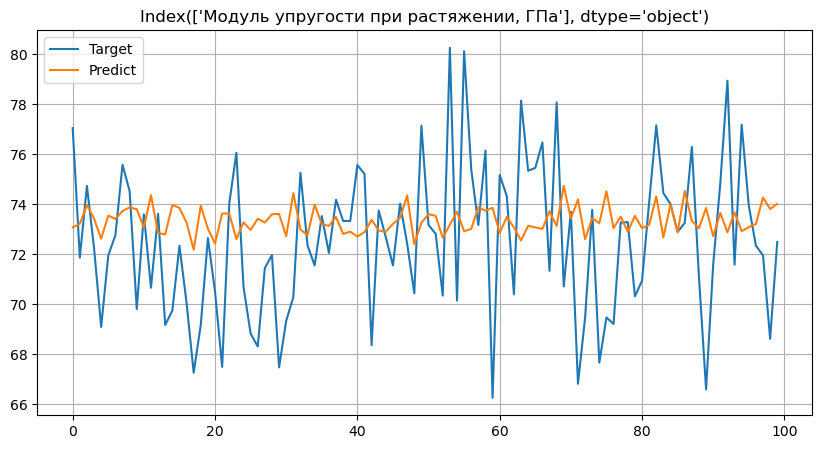

In [37]:
result(y1_test, y1_LinR)
me(y1_test, y1_LinR,'LinearRegression')

LinearRegression Index(['Прочность при растяжении, МПа'], dtype='object')
MSE: 455.35347337302835
MAE: 363.6213380407395
R2: -0.01302258905239273
MAPE: 0.15643792003073523


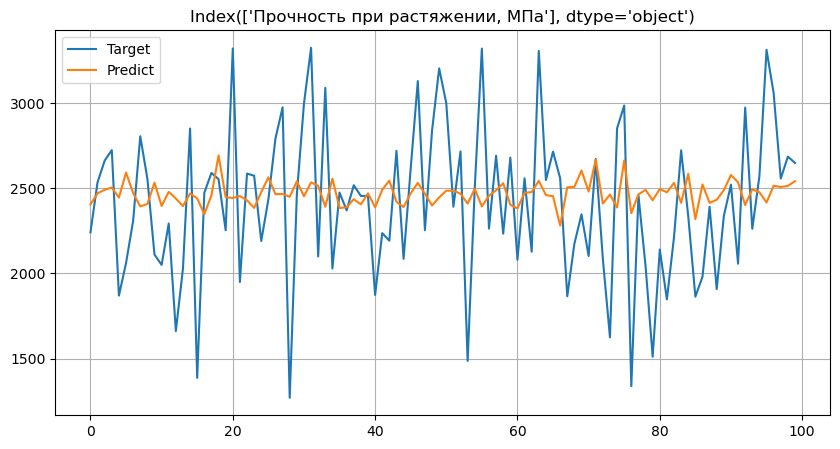

In [38]:
LinReg.fit(X2_train, y2_train)
y2_LinR = LinReg.predict(X2_test)
me(y2_test, y2_LinR,'LinearRegression')
result(y2_test, y2_LinR)

2. Метод опорных векторов

In [39]:
SVR_param = [
    {
      'kernel': ['linear'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['poly'],
      'C': [0.001, 0.01, 0.02]
    },
    {
      'kernel': ['rbf'],
      'gamma': ['scale', 'auto'],
      'C': [0.01, 0.05, 0.1, 0.2, 0.3]
    },
    {
      'kernel': ['sigmoid'],
      'C': [0.001, 0.01, 0.1]
    }
]
#grid(SVR, SVR_param, X1_train, y1_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Index(['Модуль упругости при растяжении, ГПа'], dtype='object')
MSE: 3.1630682655590334
MAE: 2.520521442828565
R2: -0.0033130378970733787
MAPE: 0.03446840319550876


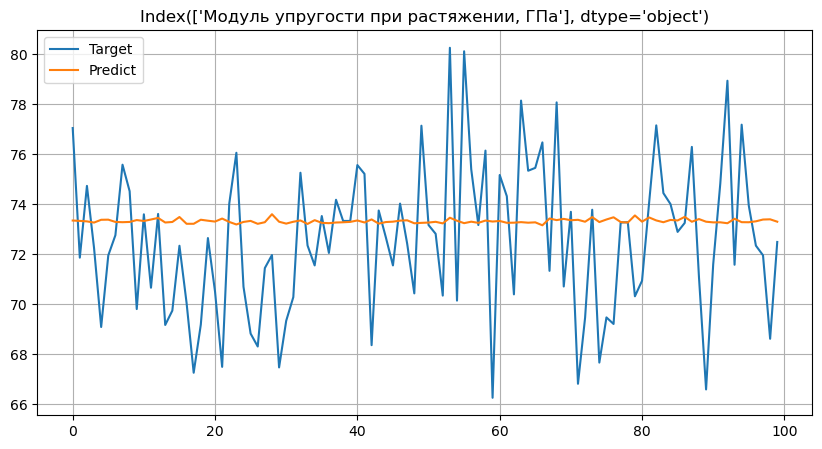

In [40]:
SVR = SVR ()
SVR.fit(X1_train, y1_train)
y1_SVR = SVR.predict(X1_test)
me(y1_test, y1_SVR,'SVR')
result(y1_test, y1_SVR)


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Index(['Прочность при растяжении, МПа'], dtype='object')
MSE: 452.72120413360443
MAE: 357.55963338905025
R2: -0.001344448547587973
MAPE: 0.1537288976048918


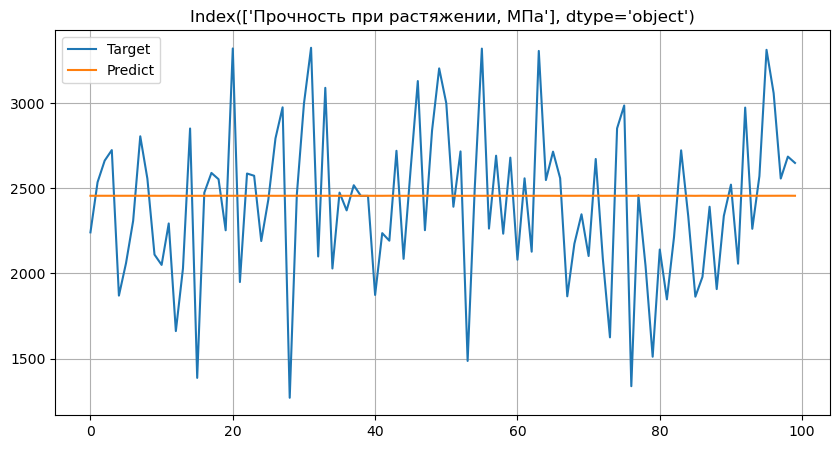

In [41]:
SVR.fit(X2_train, y2_train)
y2_SVR = SVR.predict(X2_test)
me(y2_test, y2_SVR,'SVR')
result(y2_test, y2_SVR)

3. Градиентый бустинг

In [42]:
GBR = GradientBoostingRegressor()
GBR_param = {
    'loss': ['squared_error', 'absolute_error'], 
    'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [1, 2, 3],
    'max_features': [1, 2, 5, 11]    
}
#grid(GBR, GBR_param, X1_train, y1_train)
#grid(GBR, GBR_param, X2_train, y2_train)

C:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor Index(['Модуль упругости при растяжении, ГПа'], dtype='object')
MSE: 3.166375515768057
MAE: 2.51859918195742
R2: -0.005412228749761994
MAPE: 0.03443168400415941


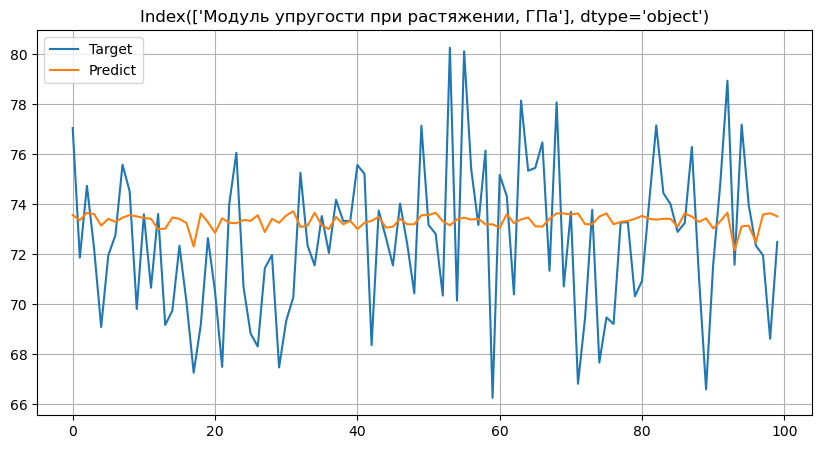

In [71]:
GBR = GradientBoostingRegressor(criterion ='friedman_mse',
 loss='absolute_error',
 max_depth= 3,
 max_features=11,
 n_estimators= 10)
GBR.fit(X1_train, y1_train,)
y1_GBR = GBR.predict(X1_test)
me(y1_test, y1_GBR,'GradientBoostingRegressor')
result(y1_test, y1_GBR)


C:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor Index(['Прочность при растяжении, МПа'], dtype='object')
MSE: 453.0533653946326
MAE: 360.07874956000717
R2: -0.0028143591627480813
MAPE: 0.154349312663431


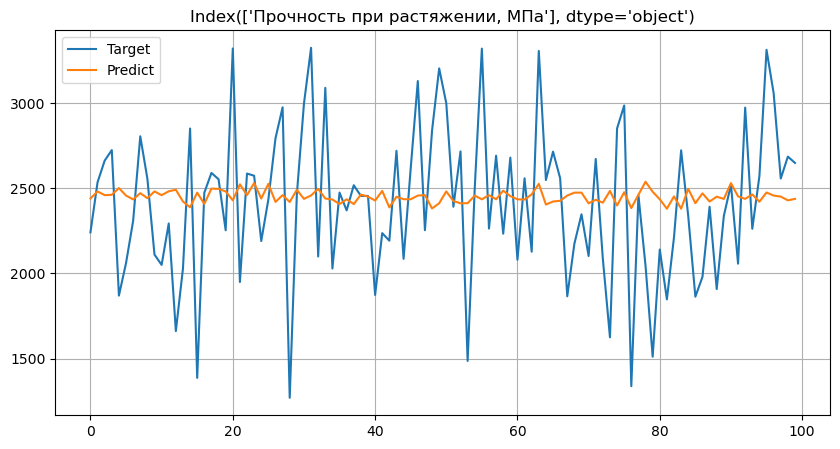

In [44]:
GBR.fit(X2_train, y2_train,)
y2_GBR = GBR.predict(X2_test)
me(y2_test, y2_GBR,'GradientBoostingRegressor')
result(y2_test, y2_GBR)

4. Метод k-ближайших соседей

In [45]:
KN = KNeighborsRegressor()
KN_param={'n_neighbors' : range(1, 400, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
#grid(KN, KN_param, X1_train, y1_train)
#grid(KN, KN_param, X2_train, y2_train)

KNeighborsRegressor Index(['Модуль упругости при растяжении, ГПа'], dtype='object')
MSE: 3.1671789514674598
MAE: 2.531021063610931
R2: -0.005922519810744653
MAPE: 0.034622414898719284


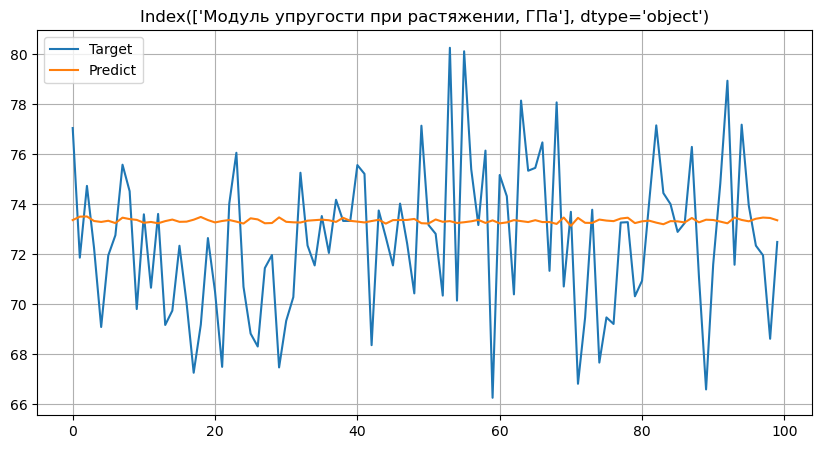

In [46]:
KN = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 251, weights = 'uniform')
KN.fit (X1_train, y1_train)
y1_KN = KN.predict(X1_test)
me(y1_test, y1_KN,'KNeighborsRegressor')
result(y1_test, y1_KN)

KNeighborsRegressor Index(['Прочность при растяжении, МПа'], dtype='object')
MSE: 450.76065585628294
MAE: 356.9870162723561
R2: 0.007309589507140113
MAPE: 0.15366046561659413


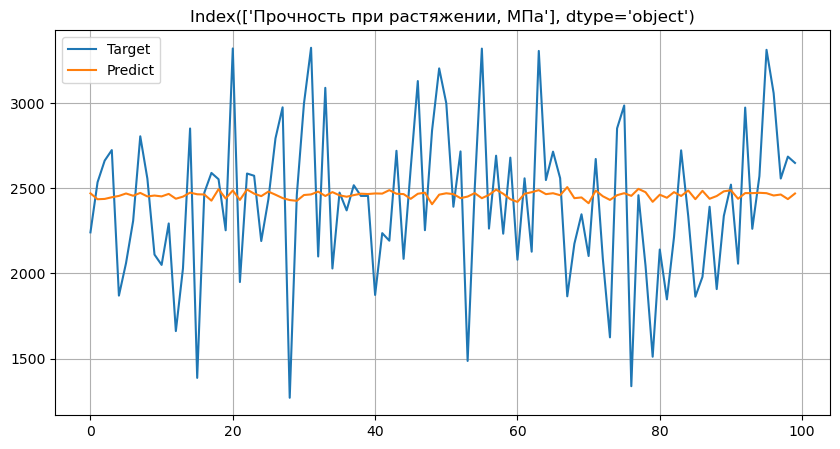

In [47]:
KN = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 289, weights = 'uniform')
KN.fit (X2_train, y2_train)
y2_KN = KN.predict(X2_test)
me(y2_test, y2_KN,'KNeighborsRegressor')
result(y2_test, y2_KN)

5. Случайный лес

In [48]:
RF = RandomForestRegressor()
RF_param = {
    'n_estimators': [10, 50, 100], 
    'criterion': ['squared_error','absolute_error', 'poisson'],
    'max_depth': [2, 3, 4, 5],
    'max_features': [1, 2, 11],
    'bootstrap': [False]
}
#grid(RF, RF_param, X1_train, y1_train)

C:\Users\trase\AppData\Local\Temp\ipykernel_6828\2317450128.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit (X1_train, y1_train)


RandomForestRegressor Index(['Модуль упругости при растяжении, ГПа'], dtype='object')
MSE: 3.1660628113690037
MAE: 2.5137485772207406
R2: -0.0052136538803877475
MAPE: 0.03436416146116394


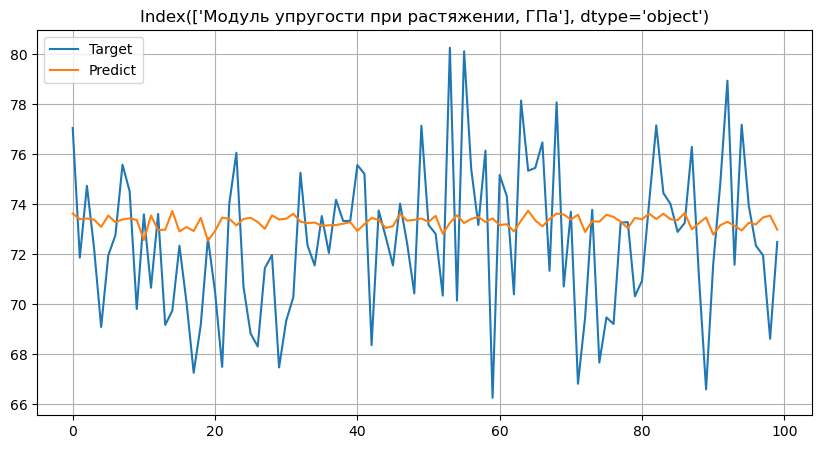

In [49]:
RF = RandomForestRegressor(bootstrap = False,
                           criterion='absolute_error',
                           max_depth=3,
                           max_features = 1,
                           n_estimators = 50)
RF.fit (X1_train, y1_train)
y1_RF = RF.predict(X1_test)
me(y1_test, y1_RF,'RandomForestRegressor')
result(y1_test, y1_RF)


C:\Users\trase\AppData\Local\Temp\ipykernel_6828\2380393157.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit (X2_train, y2_train)


RandomForestRegressor Index(['Прочность при растяжении, МПа'], dtype='object')
MSE: 449.924496521477
MAE: 357.02367059753874
R2: 0.010989047663748197
MAPE: 0.15293371444815196


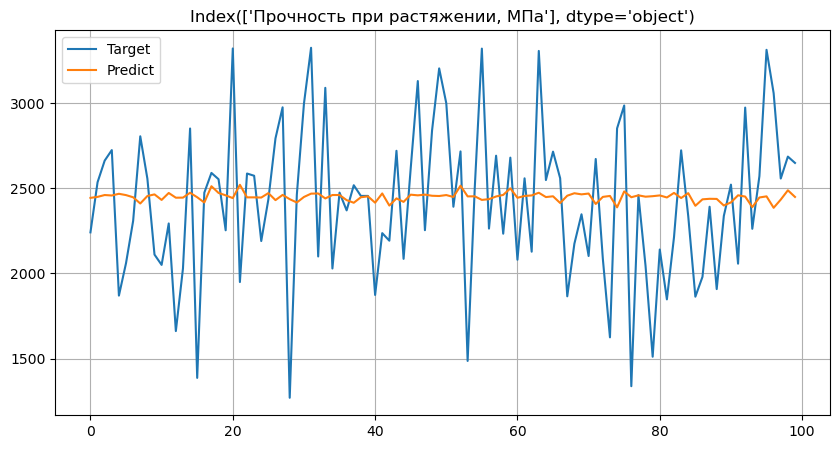

In [50]:
RF.fit (X2_train, y2_train)
y2_RF = RF.predict(X2_test)
me(y2_test, y2_RF,'RandomForestRegressor')
result(y2_test, y2_RF)

In [51]:
df1_metrics = pd.DataFrame(m1, index=m_col).T.sort_values(by='r2_score')
df2_metrics = pd.DataFrame(m2, index=m_col).T.sort_values(by='r2_score')

In [52]:
df1_metrics

mean_squared_error  mean_absolute_error  r2_score  \
LinearRegression                     3.206933             2.546990 -0.031333   
GradientBoostingRegressor            3.178877             2.528675 -0.013367   
KNeighborsRegressor                  3.167179             2.531021 -0.005923   
RandomForestRegressor                3.166063             2.513749 -0.005214   
SVR                                  3.163068             2.520521 -0.003313   

                           mean_absolute_percentage_error  
LinearRegression                                 0.034839  
GradientBoostingRegressor                        0.034558  
KNeighborsRegressor                              0.034622  
RandomForestRegressor                            0.034364  
SVR                                              0.034468

In [53]:
df2_metrics

mean_squared_error  mean_absolute_error  r2_score  \
LinearRegression                   455.353473           363.621338 -0.013023   
GradientBoostingRegressor          453.053365           360.078750 -0.002814   
SVR                                452.721204           357.559633 -0.001344   
KNeighborsRegressor                450.760656           356.987016  0.007310   
RandomForestRegressor              449.924497           357.023671  0.010989   

                           mean_absolute_percentage_error  
LinearRegression                                 0.156438  
GradientBoostingRegressor                        0.154349  
SVR                                              0.153729  
KNeighborsRegressor                              0.153660  
RandomForestRegressor                            0.152934

# # Выбор и сохранение наилучшей модели

In [54]:
best_model1 = GradientBoostingRegressor(criterion ='friedman_mse',
                                        loss='absolute_error',
                                        max_depth= 3,
                                        max_features= 11,
                                        n_estimators= 10)
best_model1.fit(X1_train, y1_train)
y1_GBR = best_model1.predict(X1_test)

C:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
best_model2 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 289, weights = 'uniform')
best_model2.fit (X2_train, y2_train)
y2_KN = best_model2.predict(X2_test)

In [56]:
import pickle 
pkl_filename1 = "best_model1.pkl" 
with open(pkl_filename1, 'wb') as file: 
    pickle.dump(best_model1, file)

In [57]:
pkl_filename2 = "best_model2.pkl" 
with open(pkl_filename2, 'wb') as file: 
    pickle.dump(best_model2, file)